# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.


We will try to predict the DODRace

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)


## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (7, 4)

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_f = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")

In [3]:
df_m = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr",encoding='latin-1')

## Explore Data

In [4]:
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [5]:
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [6]:
df_m.columns.difference(df_f.columns) # get the different column names btween data frames

Index(['subjectid'], dtype='object')

In [7]:
df_m.rename(columns={"subjectid":"SubjectId"}, inplace=True)

In [8]:
df_f.DODRace.value_counts()

1    975
2    656
3    239
4     71
6     25
5     20
Name: DODRace, dtype: int64

In [9]:
df_m.DODRace.value_counts()

1    2817
2     642
3     440
4     117
6      34
5      29
8       3
Name: DODRace, dtype: int64

In [10]:
df_f.columns.equals(df_m.columns)

True

In [11]:
df = pd.concat([df_f,df_m], axis=0, ignore_index=True)

In [12]:
df.shape

(6068, 108)

In [13]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [15]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [16]:
df.isnull().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [17]:
df.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,20757.198418,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670

In [18]:
value_counts = df.DODRace.value_counts()

In [19]:
value_counts[value_counts < 500].index.tolist()  # get the classes which has less than 500 observations

[4, 6, 5, 8]

In [20]:
remove_list = value_counts[value_counts < 500].index.tolist() # assigning to list

In [21]:
df = df[~df['DODRace'].isin(remove_list)] # removing the classes from df in the remove list

In [22]:
df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [23]:
df.reset_index(drop=True, inplace=True) # reset the index
df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [24]:
df.Ethnicity 

0                              NaN
1                          Mexican
2                              NaN
3               Caribbean Islander
4                              NaN
                   ...            
5764    Blackfoot Cherokee Choctaw
5765                           NaN
5766                           NaN
5767                           NaN
5768                           NaN
Name: Ethnicity, Length: 5769, dtype: object

In [25]:
df.Ethnicity.isnull().sum()    # almost %75 of the data is missing, so remove this column

4644

In [26]:
del df['Ethnicity']  # deleted the Ethnicity 

In [27]:
df.isnull().sum().any()

False

In [28]:
df.SubjectsBirthLocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [29]:
df.SubjectsBirthLocation.nunique() # number of unique values for this feature

136

In [30]:
df.SubjectNumericRace.nunique()

40

In [31]:
df.PrimaryMOS.nunique()

281

In [32]:
drop_columns = ["SubjectId","SubjectNumericRace","Date","Installation","Component","Branch","PrimaryMOS","Heightin","Weightlbs"] 
# this features does not have impact in the target variable and we have some other measurements for weight and height.
# so deleting those features 
# SubjectNumericRace describing the DODRace, so I will drop that

In [33]:
df.drop(drop_columns, axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [35]:
df.shape

(5769, 98)

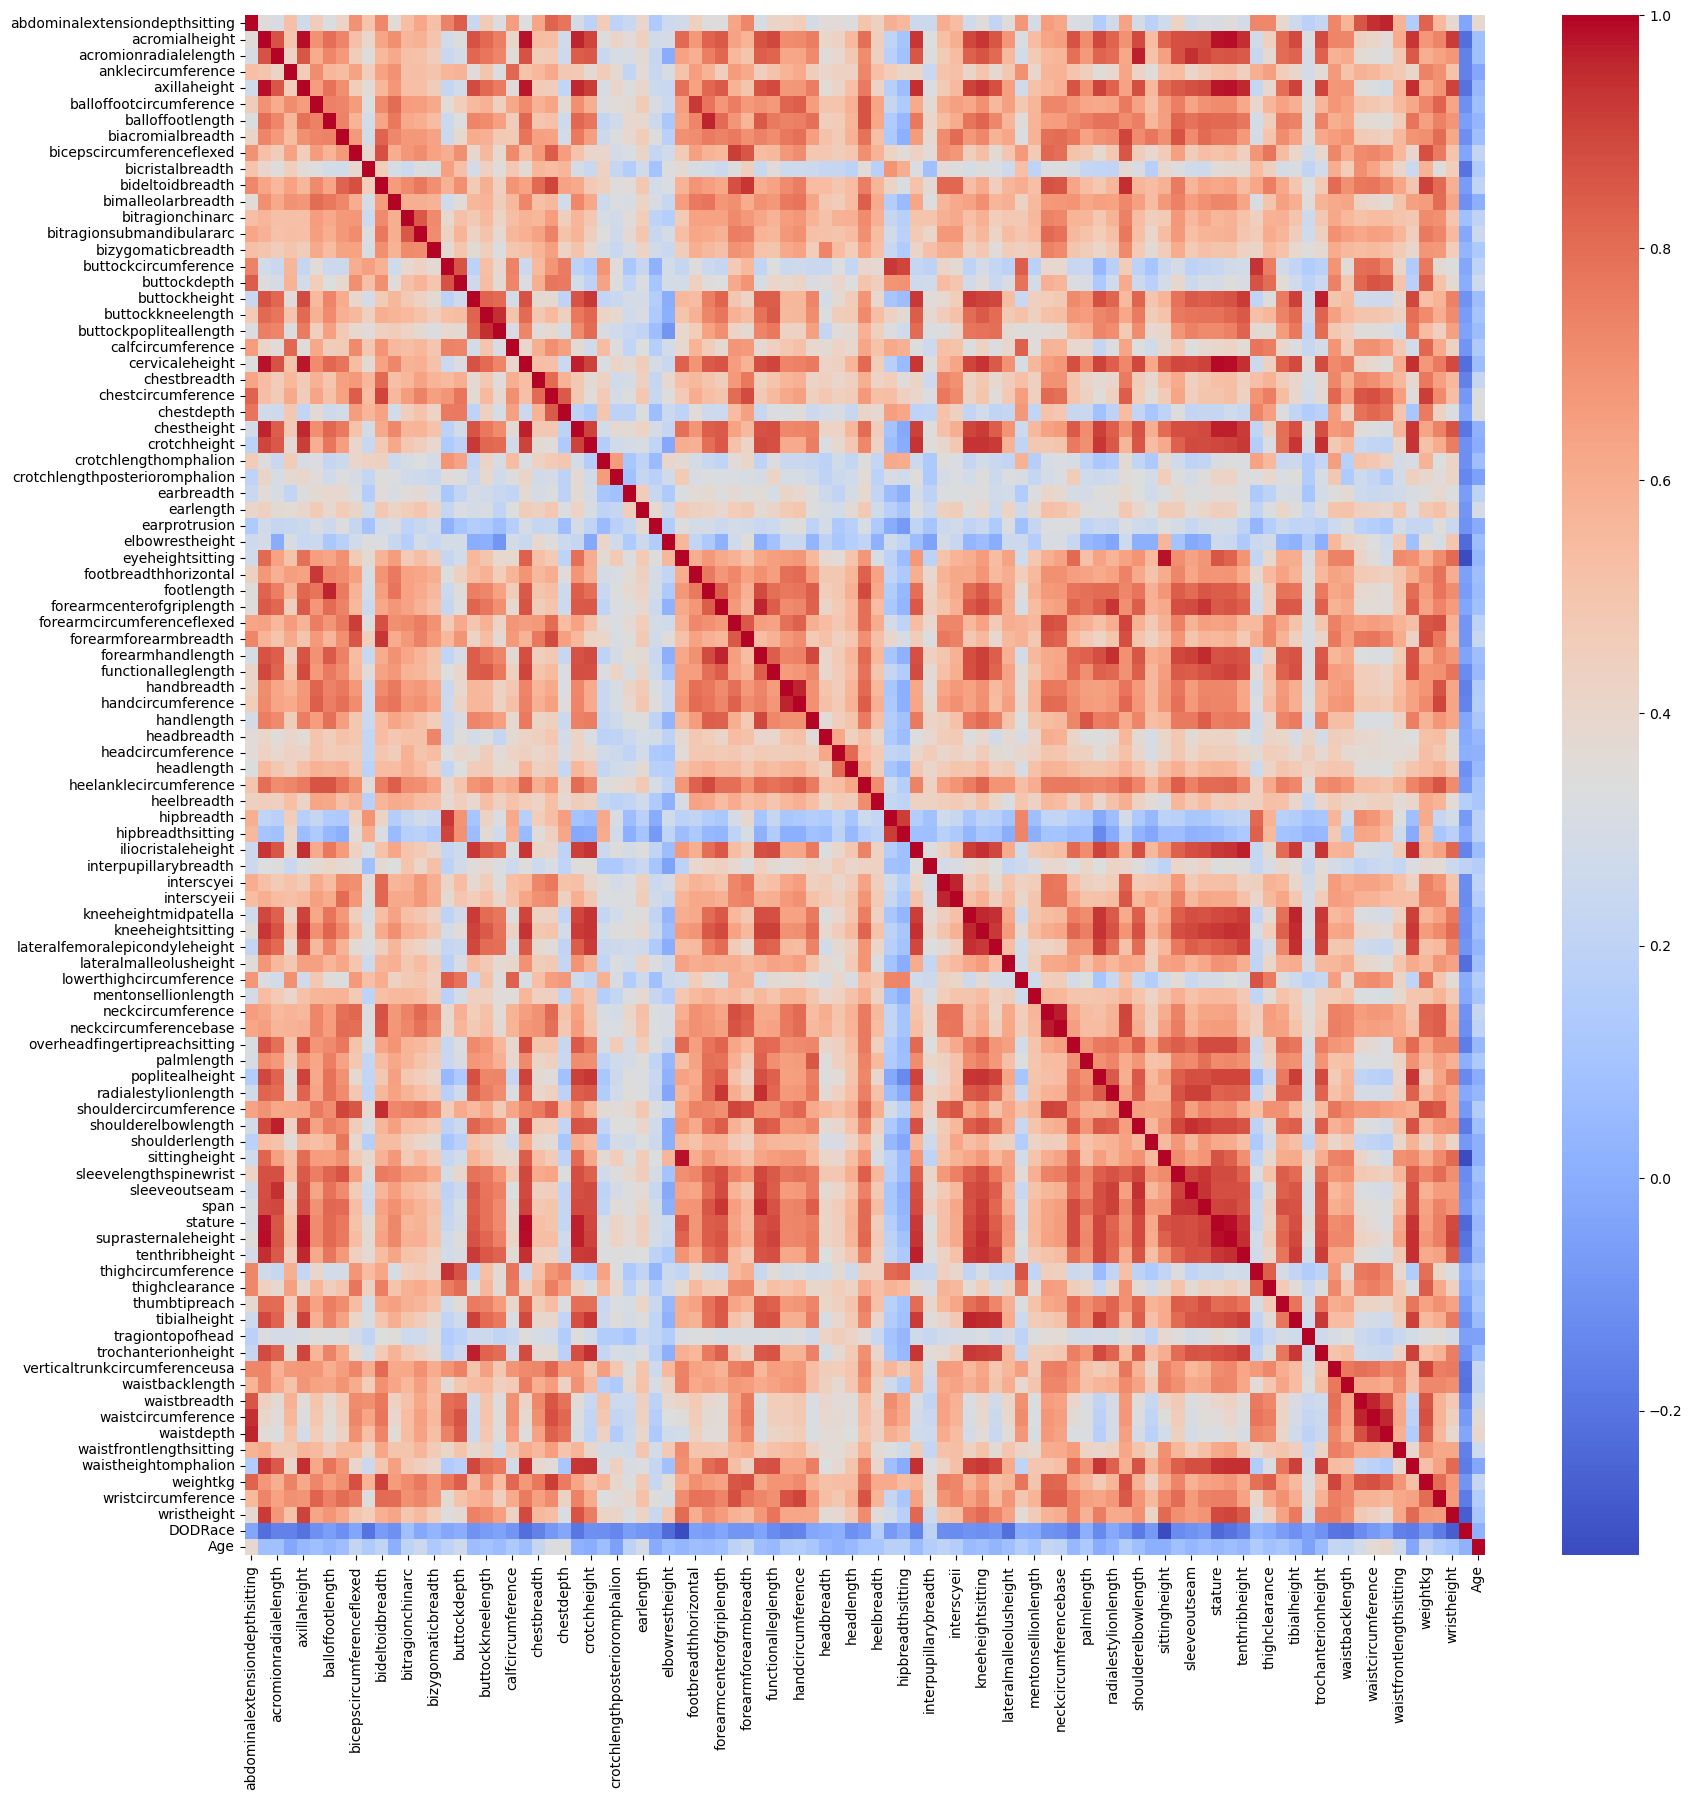

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.show()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [37]:
X = df.drop('DODRace', axis=1) # defined the dependent and independent variables
y = df.DODRace

In [38]:
from sklearn.model_selection import train_test_split # created the train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

#stratify=y to make sure propertion of each target class has same with the data in the random split as well

In [39]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [40]:
cat_col = X_train.select_dtypes("object").columns

In [41]:
cat_col # i need to transform these variables using one hot encoder since there is no order

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_col),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
operations = [
    ("OneHotEncoder", column_trans),
    ("log", LogisticRegression(class_weight="balanced",max_iter=10000, random_state=101))
]

In [45]:
pipe_log_model = Pipeline(steps=operations)

In [46]:
pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [48]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test) 

Test_Set
[[632  22 104]
 [  7 245   8]
 [ 30   6 100]]
              precision    recall  f1-score   support

           1       0.94      0.83      0.89       758
           2       0.90      0.94      0.92       260
           3       0.47      0.74      0.57       136

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[2633   59  342]
 [  30  970   38]
 [  59   19  465]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.91      3034
           2       0.93      0.93      0.93      1038
           3       0.55      0.86      0.67       543

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



#### Precision is too low for class 3 both in train and test, model is not able to predict the class 3, let's cross validate

In [ ]:
# need to do cross validation

In [49]:
scoring = {
    "precision_class3": make_scorer(precision_score,average=None,labels=["3"]),
    "recall_class3": make_scorer(recall_score, average=None,labels=["3"]),
    "f1_class3": make_scorer(f1_score, average=None,labels=["3"])
}

In [50]:
operations = [
    ("OneHotEncoder", column_trans),
    ("log", LogisticRegression(class_weight="balanced",max_iter=10000, random_state=101))
     ]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_class3     0.506285
train_precision_class3    0.548062
test_recall_class3        0.788182
train_recall_class3       0.859831
test_f1_class3            0.614040
train_f1_class3           0.669409
dtype: float64

In [ ]:
# cross validate gave better result 

### Logistic Model GridsearchCV

In [51]:
model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('log',
   LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                   verbose_feature_names_out=F

In [52]:
param_grid = {
    "log__C": [0.1,0.5,1.0],
    "log__penalty": ["l1", "l2"],
    "log__solver": ["liblinear", "lbfgs"]
}

In [53]:
recall_class3 = make_scorer(recall_score, average=None,labels=["3"])

In [54]:
operations = [
    ("OneHotEncoder", column_trans),
    ("log", LogisticRegression(class_weight="balanced",max_iter=10000, random_state=101))
     ]

model = Pipeline(steps=operations)

In [55]:
log_model_grid = GridSearchCV(model,param_grid,scoring=recall_class3,cv=10,return_train_score=True)

In [56]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             param_grid={'log__C': [0.1, 0.5, 1.0],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['3']))

In [57]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [58]:
log_model_grid.best_params_

{'log__C': 1.0, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [59]:
log_model_grid.best_score_

0.7881818181818182

In [60]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.788182
mean_train_score    0.859831
Name: 11, dtype: object

In [61]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[632  22 104]
 [  7 245   8]
 [ 30   6 100]]
              precision    recall  f1-score   support

           1       0.94      0.83      0.89       758
           2       0.90      0.94      0.92       260
           3       0.47      0.74      0.57       136

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[2633   59  342]
 [  30  970   38]
 [  59   19  465]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.91      3034
           2       0.93      0.93      0.93      1038
           3       0.55      0.86      0.67       543

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [62]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=101,
            solver="lbfgs",
            penalty="l2",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_class3     0.506285
train_precision_class3    0.548062
test_recall_class3        0.788182
train_recall_class3       0.859831
test_f1_class3            0.614040
train_f1_class3           0.669409
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [63]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_model_svc = Pipeline(steps=operations_svc)

In [64]:
pipe_model_svc.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [65]:
eval_metric(pipe_model_svc, X_train, y_train, X_test, y_test)

Test_Set
[[616  22 120]
 [  7 246   7]
 [ 31   5 100]]
              precision    recall  f1-score   support

           1       0.94      0.81      0.87       758
           2       0.90      0.95      0.92       260
           3       0.44      0.74      0.55       136

    accuracy                           0.83      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.87      0.83      0.85      1154


Train_Set
[[2570   48  416]
 [  45  952   41]
 [  61   20  462]]
              precision    recall  f1-score   support

           1       0.96      0.85      0.90      3034
           2       0.93      0.92      0.93      1038
           3       0.50      0.85      0.63       543

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [66]:
# Cross validation

model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_class3     0.467441
train_precision_class3    0.502406
test_recall_class3        0.786397
train_recall_class3       0.853896
test_f1_class3            0.584877
train_f1_class3           0.632542
dtype: float64

###  SVC Model GridsearchCV

In [67]:
model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('svc', SVC(class_weight='balanced', random_state=101))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                   verbose_feature_names_out=False),
 'svc': SVC(class_weight='b

In [68]:
param_grid = {      
    "svc__C": [0.5,1.0],
    "svc__gamma": ["scale", "auto", 0.01]
}

In [69]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101))
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_class3,
    cv=10,
    return_train_score=True,
)

In [70]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             param_grid={'svc__C': [0.5, 1.0],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['3']))

In [71]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [72]:
svm_model_grid.best_params_

{'svc__C': 1.0, 'svc__gamma': 'scale'}

In [73]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[616  22 120]
 [  7 246   7]
 [ 31   5 100]]
              precision    recall  f1-score   support

           1       0.94      0.81      0.87       758
           2       0.90      0.95      0.92       260
           3       0.44      0.74      0.55       136

    accuracy                           0.83      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.87      0.83      0.85      1154


Train_Set
[[2570   48  416]
 [  45  952   41]
 [  61   20  462]]
              precision    recall  f1-score   support

           1       0.96      0.85      0.90      3034
           2       0.93      0.92      0.93      1038
           3       0.50      0.85      0.63       543

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [74]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1.0, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

## 3. RF

### Vanilla RF Model

In [75]:
from sklearn.preprocessing import OrdinalEncoder

In [76]:
cat_col

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [77]:
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
col_trans = make_column_transformer((ord_enc, cat_col), remainder="passthrough")

In [78]:
operations_rf = [
    ("OrdinalEncoder", col_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))
]

In [79]:
pipe_model_rf = Pipeline(steps=operations_rf)
pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [80]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[741  14   3]
 [ 74 186   0]
 [125   6   5]]
              precision    recall  f1-score   support

           1       0.79      0.98      0.87       758
           2       0.90      0.72      0.80       260
           3       0.62      0.04      0.07       136

    accuracy                           0.81      1154
   macro avg       0.77      0.58      0.58      1154
weighted avg       0.79      0.81      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [81]:
operations_rf = [
    ("OrdinalEncoder", col_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1,6))
df_scores.mean()[2:]

test_precision_class3     0.776667
train_precision_class3    1.000000
test_recall_class3        0.031227
train_recall_class3       1.000000
test_f1_class3            0.059537
train_f1_class3           1.000000
dtype: float64

### RF Model GridsearchCV

In [82]:
model.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
  ('RF_model',
   RandomForestClassifier(class_weight='balanced', random_state=101))],
 'verbose': False,
 'OrdinalEncoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))]),
 'RF_model': RandomForestClassifier(class_weight='balanced', random_state=101),
 'Or

In [83]:
param_grid = {
    "RF_model__n_estimators":[400,500],
    "RF_model__max_depth": [2,3]
}

In [84]:
operations_rf = [
   ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

In [85]:
model = Pipeline(steps=operations_rf)
rf_model_grid = GridSearchCV(
    model, 
    param_grid, 
    scoring=recall_class3, 
    return_train_score=True
)

In [86]:
rf_model_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['3']))

In [87]:
rf_model_grid.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 500}

In [88]:
rf_model_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=500, random_state=101))])

In [89]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test) #RF is performing bad as well also other classes as well

Test_Set
[[375  65 318]
 [ 28 180  52]
 [ 32   9  95]]
              precision    recall  f1-score   support

           1       0.86      0.49      0.63       758
           2       0.71      0.69      0.70       260
           3       0.20      0.70      0.32       136

    accuracy                           0.56      1154
   macro avg       0.59      0.63      0.55      1154
weighted avg       0.75      0.56      0.61      1154


Train_Set
[[1573  234 1227]
 [ 125  725  188]
 [ 127   45  371]]
              precision    recall  f1-score   support

           1       0.86      0.52      0.65      3034
           2       0.72      0.70      0.71      1038
           3       0.21      0.68      0.32       543

    accuracy                           0.58      4615
   macro avg       0.60      0.63      0.56      4615
weighted avg       0.75      0.58      0.62      4615



In [90]:
operations_rf = [
    ("OrdinalEncoder", col_trans),
    ("RF_model",RandomForestClassifier(class_weight="balanced", max_depth=2, n_estimators=500, random_state=101))
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=500, random_state=101))])

In [91]:
y_pred_proba = model.predict_proba(X_test)

In [92]:
y_pred_proba

array([[0.23136239, 0.51288072, 0.25575689],
       [0.40692194, 0.21796199, 0.37511607],
       [0.27522001, 0.30143353, 0.42334646],
       ...,
       [0.39299598, 0.41171509, 0.19528893],
       [0.24867889, 0.3763842 , 0.37493691],
       [0.4325988 , 0.35042931, 0.21697189]])

In [93]:
y_pred = rf_model_grid.predict(X_test)

In [94]:
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["3"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["3"])

In [95]:
y_test

1341    2
4805    1
1711    1
2440    2
2406    2
       ..
1206    1
4891    1
3483    1
1351    2
5474    1
Name: DODRace, Length: 1154, dtype: int64

In [98]:
rf_f1

array([0.31613977])

## 4. XGBoost

### Vanilla XGBoost Model

In [99]:
operation_xgb = [
    ("OrdinalEncoder", col_trans),
    ("XGB_model", XGBClassifier(random_state=101))
]

In [100]:
y_train.value_counts()

1    3034
2    1038
3     543
Name: DODRace, dtype: int64

In [101]:
pipe_model_xgb = Pipeline(steps=operation_xgb)

y_train_xgb = y_train.map({1:0, 2:1, 3:2})
y_test_xgb = y_test.map({1:0, 2:1, 3:2})

In [102]:
y_train_xgb.value_counts()

0    3034
1    1038
2     543
Name: DODRace, dtype: int64

In [103]:
pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [104]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[725  17  16]
 [ 29 230   1]
 [ 75   9  52]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       758
           1       0.90      0.88      0.89       260
           2       0.75      0.38      0.51       136

    accuracy                           0.87      1154
   macro avg       0.84      0.74      0.77      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



#### let's see how the results change if we add class weight

In [105]:
from sklearn.utils import class_weight

In [106]:
classes_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train_xgb
)
classes_weights

array([2.8330264 , 2.8330264 , 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [107]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp

,weights,label
343,2.833026,2
3310,2.833026,2
5472,0.507031,0
1844,2.833026,2
2094,1.482017,1
...,...,...
4873,2.833026,2
1933,2.833026,2
3200,0.507031,0
4301,0.507031,0


In [108]:
comp.groupby("label").value_counts()

label  weights 
0      0.507031    3034
1      1.482017    1038
2      2.833026     543
dtype: int64

In [109]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [110]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[709  18  31]
 [ 27 231   2]
 [ 67   9  60]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       758
           1       0.90      0.89      0.89       260
           2       0.65      0.44      0.52       136

    accuracy                           0.87      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [111]:
scoring_xgb = {
    "precision_class3": make_scorer(precision_score, average=None, labels=["2"]),
    "recall_class3": make_scorer(recall_score, average=None, labels=["2"]),
    "f1_class3": make_scorer(f1_score, average=None, labels=["2"]),
}


In [112]:
operation_xgb = [
    ("OrdinalEncoder", col_trans),
    ("XGB_model", XGBClassifier(random_state=101))
]

model = Pipeline(steps=operation_xgb)

scores = cross_validate(                             #cross validation is returning the similar result
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_class3     0.706090
train_precision_class3    1.000000
test_recall_class3        0.482348
train_recall_class3       1.000000
test_f1_class3            0.571619
train_f1_class3           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [113]:
model.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
  ('XGB_model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, 

In [114]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [115]:
operations_xgb = [
    ("OrdinalEncoder", col_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operation_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[2]),
    cv=5,
    #n_jobs=-1,
    return_train_score=True,
)

In [116]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [117]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[486  75 197]
 [ 18 203  39]
 [ 35  20  81]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       758
           1       0.68      0.78      0.73       260
           2       0.26      0.60      0.36       136

    accuracy                           0.67      1154
   macro avg       0.61      0.67      0.61      1154
weighted avg       0.78      0.67      0.70      1154


Train_Set
[[2064  280  690]
 [  95  805  138]
 [ 120   72  351]]
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      3034
           1       0.70      0.78      0.73      1038
           2       0.30      0.65      0.41       543

    accuracy                           0.70      4615
   macro avg       0.63      0.70      0.64      4615
weighted avg       0.79      0.70      0.72      4615



In [118]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [119]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [120]:
perations_xgb = [
    ("OrdinalEncoder", col_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=40,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [121]:
eval_metric(model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[709  18  31]
 [ 27 231   2]
 [ 67   9  60]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       758
           1       0.90      0.89      0.89       260
           2       0.65      0.44      0.52       136

    accuracy                           0.87      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [123]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [126]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.38278706881428537

In [127]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.3335487552509093

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [128]:
cat_col

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [129]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_col),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [130]:
final_model.fit(X, y) 

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [131]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7660592782537383

In [132]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7574919674606115